# 6. Análisis de Correlación

## Setup

In [25]:
import sys, os
sys.path.append(os.getcwd().replace('/notebooks',''))  # Replace with current directory name

In [26]:
#===== Configuración regional =================================
import locale

# Name might vary with operating system.
locale.setlocale(locale.LC_ALL, 'es_ES')

locale._override_localeconv["thousands_sep"] = "."

#===== Librerías ==============================================
# Importing the Warnings library for better presentation
import warnings

# Importando la biblioteca pandas para manipulación y análisis de datos
import pandas as pd
# Importando NumPy para operaciones numéricas y manipulación de arreglos
import numpy as np
# Importando itertools para generar combinaciones de columnas
import itertools

# Importando matplotlib.pyplot para crear gráficos y visualizaciones
import matplotlib.pyplot as plt
# Importando Seaborn para visualización de datos estadísticos (opcional, pero puede complementar a Plotly)
import seaborn as sns
# Importando Plotly Express para visualizaciones interactivas de alto nivel y fáciles de usar
import plotly.express as px
# Importando Plotly Graph Objects para un control más detallado sobre las visualizaciones
import plotly.graph_objects as go
# Multiple graphs in a figure
from plotly.subplots import make_subplots

# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose

#===== Ajustes visualización gráficos ============================
warnings.filterwarnings('ignore', category=DeprecationWarning)
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'
warnings.resetwarnings()

# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

#===== Librerías proyecto ============================
from utils.data import Datasets
from utils.eda import column_explore


## Carga Inicial de Datos

In [27]:
ds = Datasets()
cash_orig, fees_orig = ds.get_original_datasets()

## Gráficos de Dispersión

In [164]:
# Ref. https://python-graph-gallery.com/111-custom-correlogram/
# sns.pairplot(cash_orig)
dimensions = []
for c in cash_orig.describe().columns.tolist():
    dimensions.append(dict(label=c,
                              values=cash_orig[c]))
    

fig = go.Figure(data=go.Splom(
               dimensions=dimensions,
               showupperhalf=False,
               diagonal_visible=False,
               opacity=0.4
               ))


fig.update_layout(
    width=1024,
    height=800,
    title='Gráficos de dispersión para cash_request'
)

fig.show()

In [165]:
# sns.pairplot(fees_orig)
dimensions = []
for c in fees_orig.describe().columns.tolist():
    dimensions.append(dict(label=c,
                              values=fees_orig[c]))
    

fig = go.Figure(data=go.Splom(
               dimensions=dimensions,
               showupperhalf=False,
               diagonal_visible=False,
               opacity=0.4
               ))


fig.update_layout(
    width=1024,
    height=800,
    title='Gráficos de dispersión para fees'
)

fig.show()

## Matrices de correlación

Text(0.5, 1.0, 'Correlation matrix for cash_request')

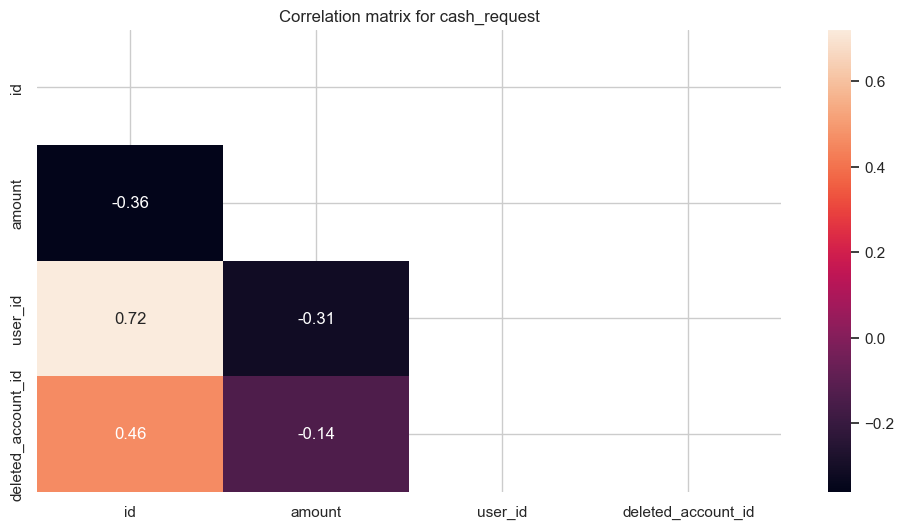

In [160]:
numericals = cash_orig.select_dtypes(np.number)
corr = numericals.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt = sns.heatmap(corr.round(2), mask=mask, annot=True)
plt.set_title('Correlation matrix for cash_request')

Text(0.5, 1.0, 'Correlation matrix for fees')

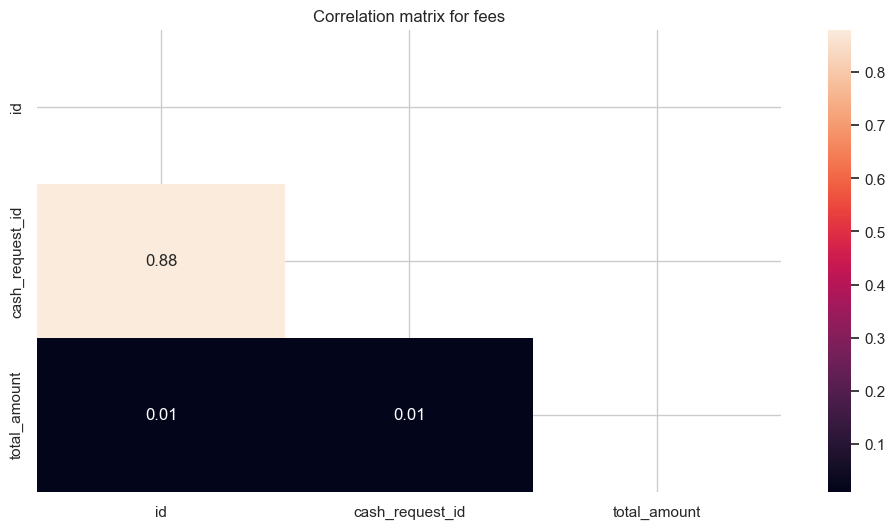

In [162]:
numericals = fees_orig.select_dtypes(np.number)
corr = numericals.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt = sns.heatmap(corr.round(2), mask=mask, annot=True)
plt.set_title('Correlation matrix for fees')